<a href="https://colab.research.google.com/github/Suerine/ML_models/blob/main/Identifying_Phishing_attempts_with_DTs_%26_LR_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
import time
plt.style.use('ggplot')

In [16]:
phish_data = pd.read_csv("/content/urlset.csv")
phish_data.head(15)

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1,0,18,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.800000,0.795729,1
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0,0,11,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.768577,1
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0,0,14,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0.000000,0.726582,1
3,mail.printakid.com/www.online.americanexpress....,10000000,0,0,6,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.859640,1
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0,0,8,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.748971,1
5,smilesvoegol.servebbs.org/voegol.php,10000000,0,0,2,223.500000,234.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.852227,1
6,premierpaymentprocessing.com/includes/boleto-2...,10000000,0,0,4,119.000000,121.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.853565,1
7,myxxxcollection.com/v1/js/jih321/bpd.com.do/do...,10000000,0,0,4,160.500000,157.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.777622,1
8,super1000.info/docs,10000000,0,0,1,21.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.360000,1
9,horizonsgallery.com/js/bin/ssl1/_id/www.paypal...,10000000,0,0,16,142.375000,142.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.803006,1


In [17]:
phish_data.shape

(95911, 14)

In [18]:
phish_data.dtypes

domain            object
ranking            int64
mld_res            int64
mld.ps_res         int64
card_rem           int64
ratio_Rrem       float64
ratio_Arem       float64
jaccard_RR       float64
jaccard_RA       float64
jaccard_AR       float64
jaccard_AA       float64
jaccard_ARrd     float64
jaccard_ARrem    float64
label              int64
dtype: object

In [19]:
phish_data.describe()

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
count,9.591100e+04,95911.000000,95911.000000,95911.000000,95911.000000,95911.000000,95911.000000,95911.000000,95911.000000,95911.000000,95911.000000,95911.000000,95911.000000
mean,5.888741e+06,0.455610,0.202459,4.573886,135.262910,138.554841,0.004011,0.003769,0.003368,0.003645,0.307748,0.703612,0.499442
std,4.878412e+06,0.498028,0.401834,4.343259,160.994495,175.486561,0.028747,0.024479,0.023795,0.028260,0.363083,0.204247,0.500002
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.547100e+04,0.000000,0.000000,2.000000,43.000000,39.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.675079,0.000000
50%,1.000000e+07,0.000000,0.000000,3.000000,104.043478,103.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.768166,0.000000
75%,1.000000e+07,1.000000,0.000000,6.000000,174.142857,178.316666,0.000000,0.000000,0.000000,0.000000,0.666667,0.818942,1.000000
max,1.000000e+07,1.000000,1.000000,58.000000,5507.000000,6097.000000,1.000000,0.916667,1.000000,1.000000,1.000000,0.967886,1.000000


# Data Cleaning

In [22]:
phish_data = phish_data[['domain', 'ranking', 'mld_res',
            #'mld.ps_res',
            'card_rem', 'ratio_Rrem','ratio_Arem',
            #'jaccard_RR', 'jaccard_RA', 'jaccard_AR', 'jaccard_AA', 'jaccard_ARrd',
            'jaccard_ARrem', 'label']].copy()

In [20]:
phish_data.shape

(95911, 14)

In [21]:
phish_data.isnull().sum()

domain           0
ranking          0
mld_res          0
mld.ps_res       0
card_rem         0
ratio_Rrem       0
ratio_Arem       0
jaccard_RR       0
jaccard_RA       0
jaccard_AR       0
jaccard_AA       0
jaccard_ARrd     0
jaccard_ARrem    0
label            0
dtype: int64

<Axes: >

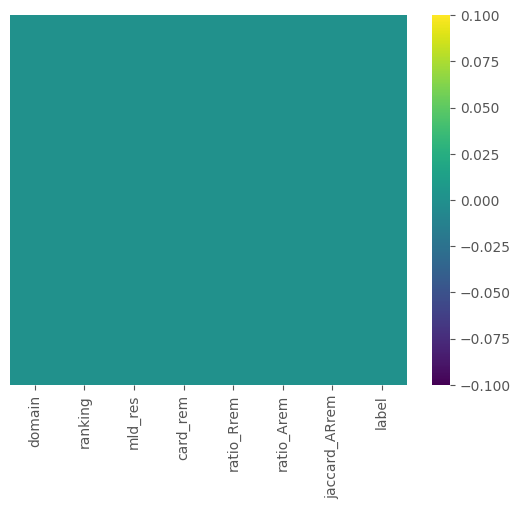

In [23]:
sns.heatmap(phish_data.isnull(),yticklabels=False, cbar=True,cmap='viridis')

In [24]:
phish_data.dropna(inplace=True)

<Axes: >

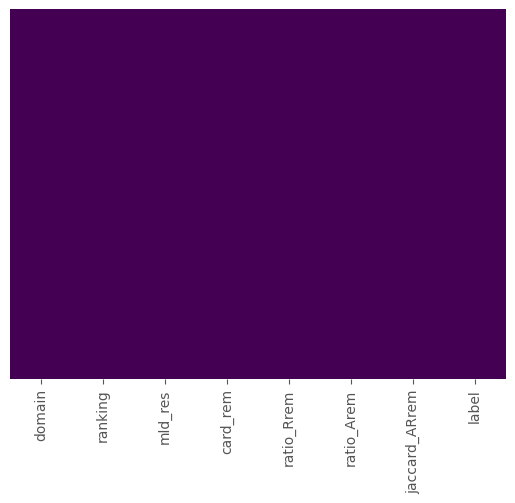

In [25]:
sns.heatmap(phish_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [26]:
#The "label" column provides the domain entry status, 0: legitimate / 1:phishing
phish_data.sample(50)

,domain,ranking,mld_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_ARrem,label
5409,codiumlab.com/aol/index.htm,10000000,0,3,65.333333,46.333333,0.543779,1
28852,funkleber.ch/seguranca/https/seguro/index.html,10000000,0,6,74.500000,72.333333,0.801636,1
82328,www.ics.uci.edu/pub/ietf/http/related/iso639.txt,8935,1,6,43.333333,39.833333,0.630719,0
26158,www.rahayuchemical.co.id/cache/i/visa.com.br/p...,10000000,0,8,93.375000,86.750000,0.727818,1
53549,www.libertymachinery.com/appraisers.html,10000000,0,2,142.000000,141.500000,0.846906,0
72557,dit.unitn.it/~kokash/,45206,1,2,31.500000,24.000000,0.585714,0
24824,badgerhdtv.com/~linkbadg/upload/paypal.com/us/...,10000000,0,15,157.200000,159.400000,0.781989,1
79445,www.ualberta.ca/~rchladny/,13979,1,2,18.000000,10.500000,0.500000,0
62855,en.wikipedia.org/wiki/SuperH,6,1,2,381.500000,402.000000,0.881152,0
89665,www.linux-mag.com/id/374,248065,0,0,0.000000,0.000000,0.000000,0


# Feature Understanding

In [27]:
phish_data['domain'].value_counts()

domain
'www.allegropl.xaa.pl/enter_login.html?session=OGY1YgQGXQALBwcxzvcxNYWgFVVgMPBgANAAcEAwMHDg1cUlEBAFNbDABQAwEHUlvcbcvxcgbcANzA5OA\%3D\%3D&amp;global_login_hash=1f0f47e7fcvxvvc8fb48f851c41eafvdgdg33a7&amp;session_login_hash=e4baf33efvdsfdsg6422224f66b652028fvcxfvde726&amp;url=N2NjOAwWQBYNTExZCAzxzdfvzgfhfgVgAAVxEMQElzBgFZEAdHSXMGAVkQB0dIRwsTFxYHRxZYDRBdIg1GCvdgdgcxzcszdfbgFRWZGI0Zg\%3D\%3D&amp;cod=OGZkcsVlNmcsk&amp;version=A'    2
bin/webscr?cmd=_login-                                                                                                                                                                                                                                                                                                                                                                                                                         2
nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/in

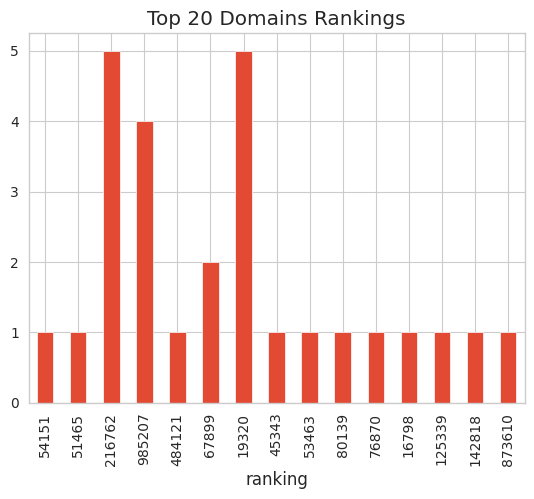

In [29]:
ax = phish_data['ranking'].value_counts() \
    .sample(15) \
    .plot(kind='bar', title='Top 20 Domains Rankings')

<ipython-input-28-09d6694785f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=phish_data, palette='RdBu_r')


<Axes: xlabel='label', ylabel='count'>

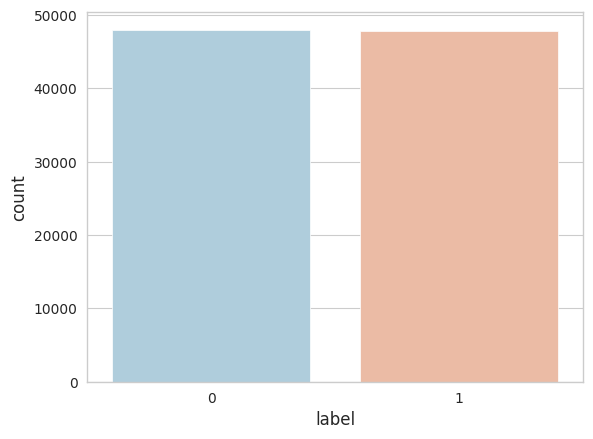

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='label', data=phish_data, palette='RdBu_r')

<Axes: ylabel='Frequency'>

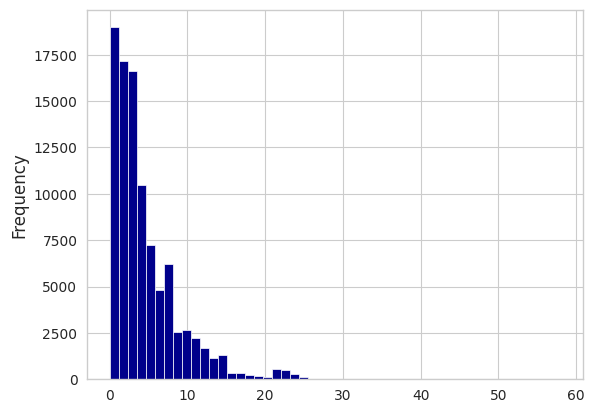

In [30]:
phish_data['card_rem'].plot(kind='hist', bins=50, color='darkblue')

<Axes: ylabel='Density'>

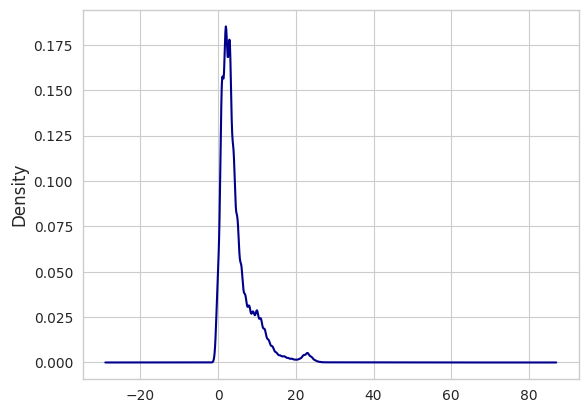

In [31]:
phish_data['card_rem'].plot(kind='kde', color='darkblue')

<ipython-input-32-2e36b8d964a1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot (x='label', y='card_rem', data=phish_data, palette='winter')


<Axes: xlabel='label', ylabel='card_rem'>

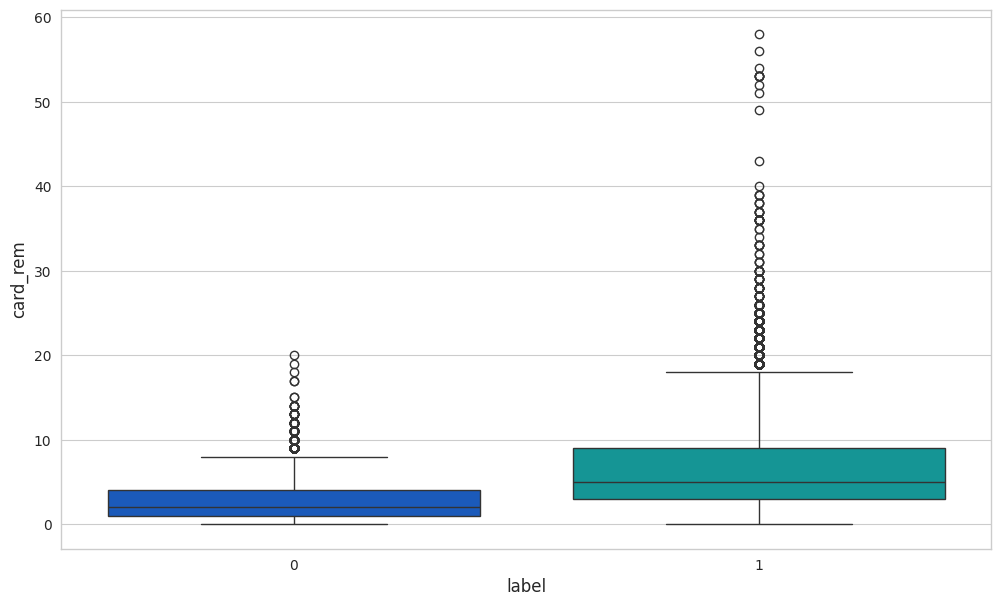

In [32]:
plt.figure(figsize=(12, 7))
sns.boxplot (x='label', y='card_rem', data=phish_data, palette='winter')

<Axes: ylabel='Density'>

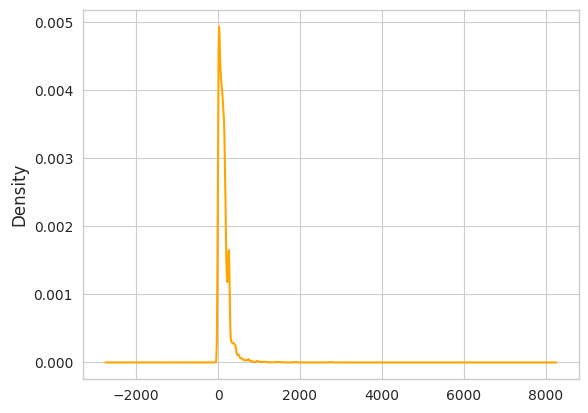

In [33]:
phish_data['ratio_Rrem'].plot(kind='kde', color='orange')

# Feature Relationships


<Axes: xlabel='ratio_Rrem', ylabel='ratio_Arem'>

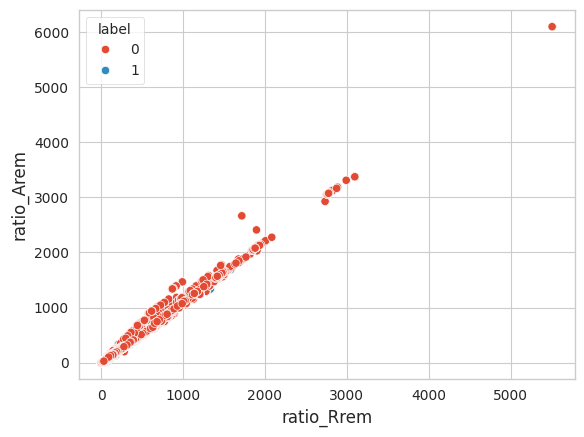

In [34]:
sns.scatterplot(x='ratio_Rrem', y='ratio_Arem', hue='label', data=phish_data)

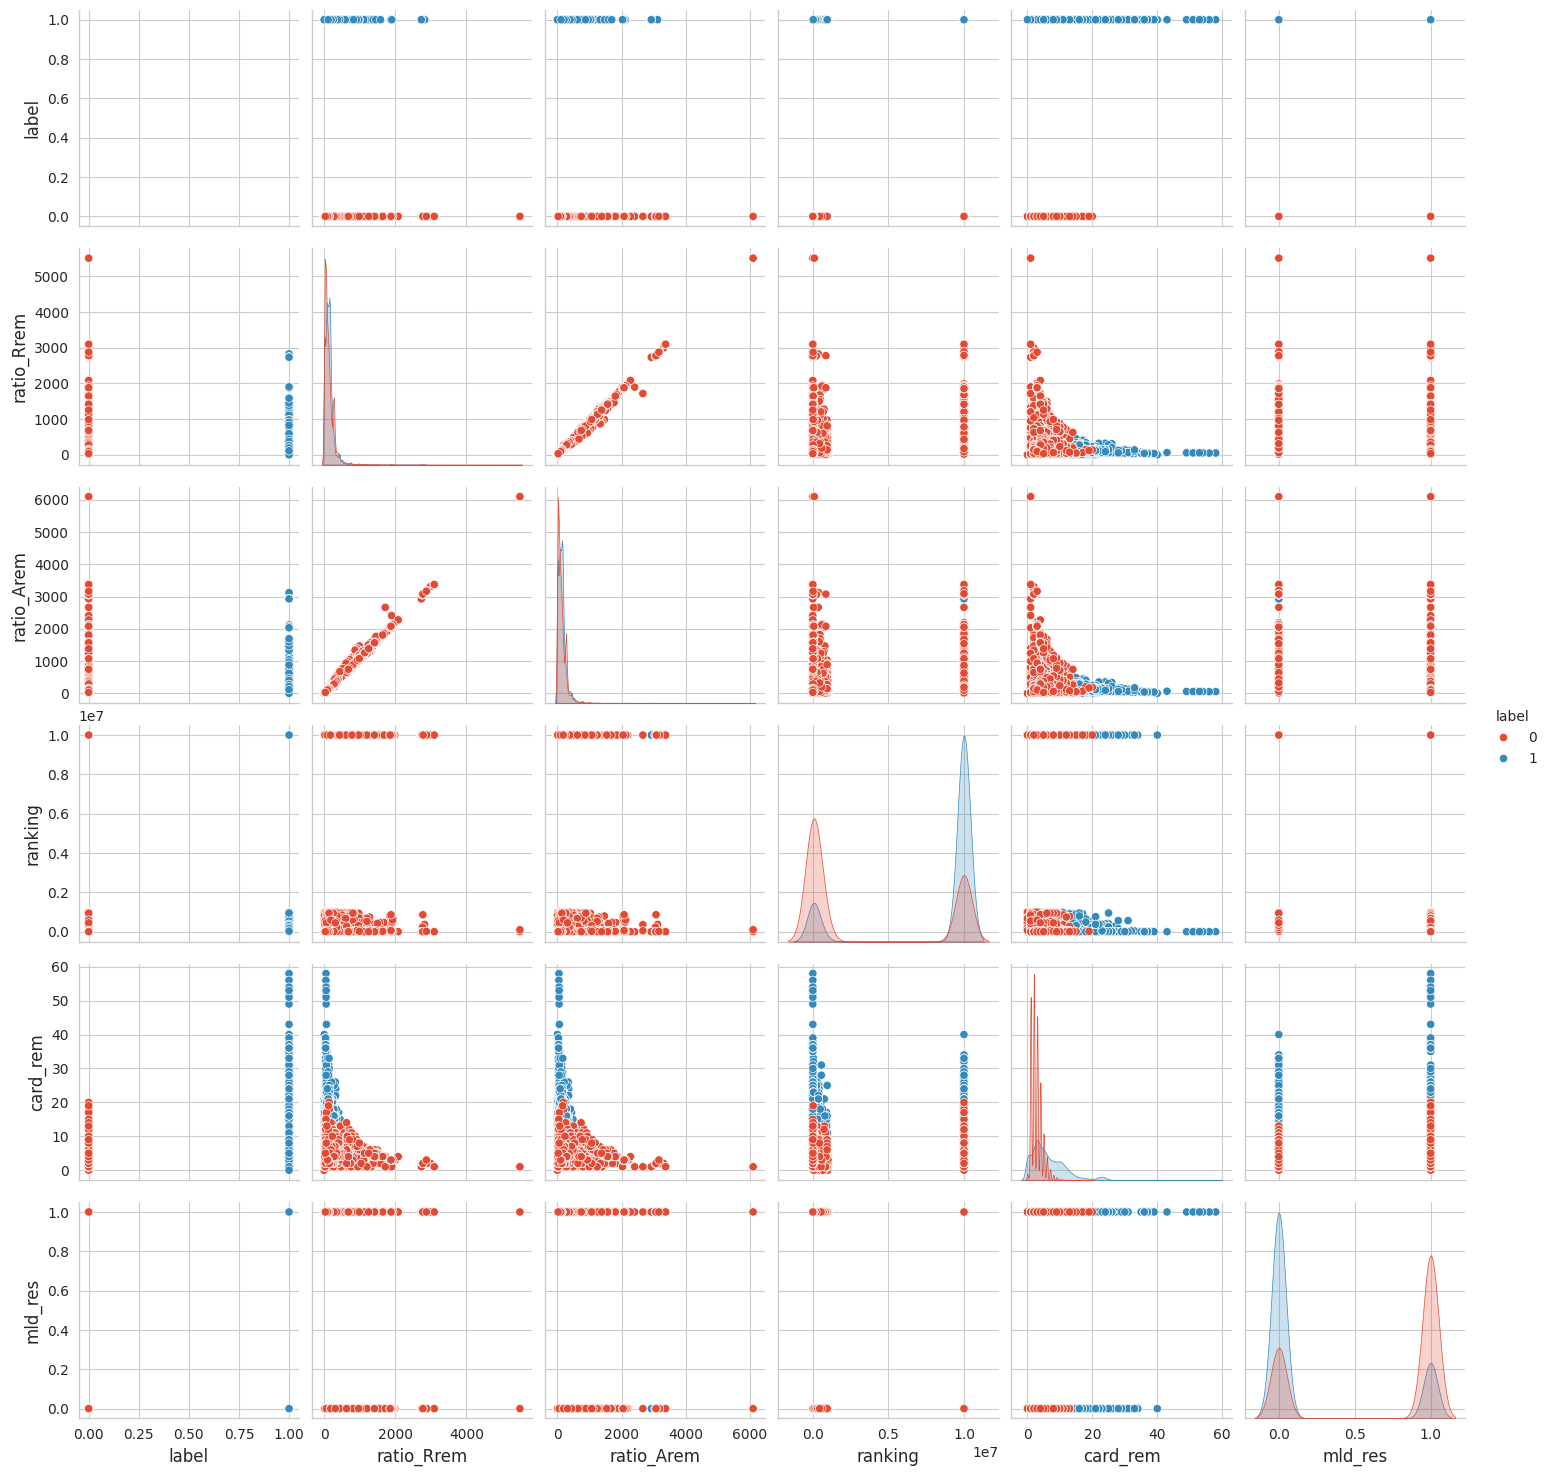

In [25]:
sns.pairplot(phish_data, vars=['label', 'ratio_Rrem', 'ratio_Arem',
                               'ranking', 'card_rem', 'mld_res'],
             hue='label')

In [35]:
phish_data_corr = phish_data[['label', 'ratio_Rrem', 'ratio_Arem',
'ranking', 'card_rem','jaccard_ARrem']].dropna().corr()

phish_data_corr

,label,ratio_Rrem,ratio_Arem,ranking,card_rem,jaccard_ARrem
label,1.000000,-0.018242,-0.022768,0.500197,0.429407,-0.081310
ratio_Rrem,-0.018242,1.000000,0.996549,-0.007071,0.018067,0.395472
ratio_Arem,-0.022768,0.996549,1.000000,-0.010713,0.015142,0.376407
ranking,0.500197,-0.007071,-0.010713,1.000000,0.157856,-0.014396
card_rem,0.429407,0.018067,0.015142,0.157856,1.000000,0.301487
jaccard_ARrem,-0.081310,0.395472,0.376407,-0.014396,0.301487,1.000000


<Axes: >

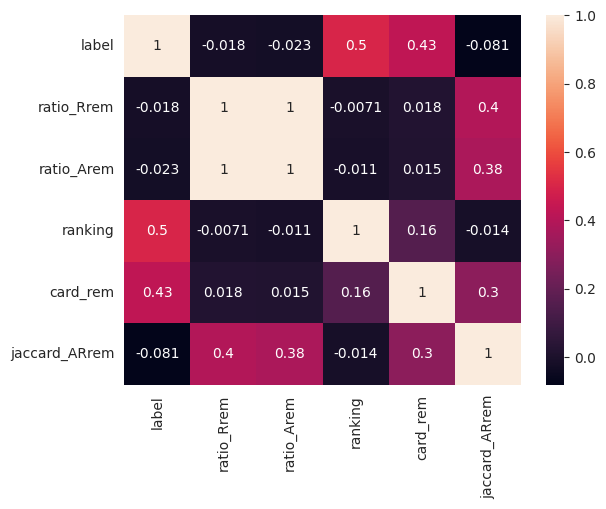

In [36]:
sns.heatmap(phish_data_corr, annot=True)

# Questioning & Observing the Data

What ways can this data detect whether a website is a phishing site or not?

One way to go about this using simple linear regression is by converting the 'domains' into numerical features and combining them with the labels to build a sufficient model.

I have observed that another way I can identify this is when the card_rem, ratio_Rrem and ratio_Arem are high, chances are it is a phishing website. Although this is not always the case, we can gather enough data using these features and combine them with the method above.

*   Are there any two features that can be paired together in order to build a simple linear regression model and a decision tree?

 ** From what I can observe, some features have a correlation with each other and others don't. Some correlations are high such as ratio_Rrem and ratio_Arem. Some features have a negative correlation such as label and jaccard_ARrem. Some features have a mild correlation such as ranking and label. This means pairing up the right features can help us accomplish our goals.**

  
*   What does the data tell us about the charateristics of a phishing website?

As for now, I can particularly say that the domains are of assistance in determining this information, but the rest of the values such as the ranking and the card_rem are also sufficient in determining whether the website is a phishing website or not.







In [37]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline

In [38]:
phish_data['domain'].values

array(['nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526',
       'www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_home-customer&nav=1/loading.php',
       'serviciosbys.com/paypal.cgi.bin.get-into.herf.secure.dispatch35463256rzr321654641dsf654321874/href/href/href/secure/center/update/limit/seccure/4d7a1ff5c55825a2e632a679c2fd5353/',
       ..., 'www.gamespot.com/xbox360/action/deadspace/',
       'en.wikipedia.org/wiki/Dead_Space_(video_game)',
       'www.angelfire.com/goth/devilmaycrytonite/'], dtype=object)

In [39]:
phish_data['label']

0        1
1        1
2        1
3        1
4        1
        ..
95906    0
95907    0
95908    0
95909    0
95910    0
Name: label, Length: 95911, dtype: int64

In [40]:
from sklearn.linear_model import LogisticRegression

In [44]:
def extract_features(domain):
    features = {}
    features['length'] = len(domain)
    features['num_special_chars'] = len(re.findall(r'[-./=&?;%()!@]', domain))
    features['num_subdomains'] = domain.count('.') - 1
    features['has_login'] = int('login' in domain.lower())
    features['has_verify'] = int('verify' in domain.lower())
    features['has_secure'] = int('secure' in domain.lower())
    features['has_bank'] = int('bank' in domain.lower())
    features['has_update'] = int('update' in domain.lower())
    return features


In [45]:
feature_data = phish_data['domain'].apply(extract_features).apply(pd.Series)
feature_data.sample(10)

,length,num_special_chars,num_subdomains,has_login,has_verify,has_secure,has_bank,has_update
21976,20,3,1,0,0,0,0,0
18324,88,19,5,1,0,0,0,0
68005,27,4,1,0,0,0,0,0
64743,31,4,1,0,0,0,0,0
88534,33,6,1,0,0,0,0,0
14531,150,22,7,1,0,0,0,0
91490,55,9,2,0,0,0,0,0
21852,33,4,0,0,0,0,0,0
392,67,10,2,0,0,0,0,0
46549,79,9,5,1,0,0,0,0


In [46]:
# Concatenate the feature dataframes into a single DataFrame
X = feature_data
y = phish_data['label']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
X_train.shape

(76728, 8)

In [49]:
X_train.columns

Index(['length', 'num_special_chars', 'num_subdomains', 'has_login',
       'has_verify', 'has_secure', 'has_bank', 'has_update'],
      dtype='object')

In [50]:
X_train.sample(10)

,length,num_special_chars,num_subdomains,has_login,has_verify,has_secure,has_bank,has_update
12137,105,24,6,1,0,0,0,0
82934,37,5,1,0,0,0,0,0
84429,22,3,0,0,0,0,0,0
5341,65,9,1,0,0,0,0,0
82823,30,4,1,0,0,0,0,0
54722,57,8,2,0,0,0,0,0
52057,29,4,1,0,0,0,0,0
80454,44,7,1,0,0,0,0,0
89743,55,6,2,0,0,0,0,0
85736,38,6,1,0,0,0,0,0


In [51]:
y_train.shape

(76728,)

In [52]:
y_test.shape

(19183,)

# Training and Predicting

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
logmodel = LogisticRegression()

In [55]:
logmodel

LogisticRegression()

In [56]:
X_train.info

<bound method DataFrame.info of        length  num_special_chars  num_subdomains  has_login  has_verify  \
21336      46                  7               3          1           0   
81984      34                  5               1          0           0   
75262      48                  5               2          0           0   
31251     103                 22               4          1           0   
34637      39                  5               1          0           0   
...       ...                ...             ...        ...         ...   
6265       60                 11               4          0           0   
54886      45                  6               2          0           0   
76820      33                  6               4          0           0   
860        75                 10               0          0           0   
15795      11                  2               0          0           0   

       has_secure  has_bank  has_update  
21336           0         0           0  
81984           0         0           0  
75262           0         0           0  
31251           0         0           0  
34637           0         0           0  
...           ...       ...         ...  
6265            0         0           0  
54886           0         0           0  
76820           0         0           0  
860             0         0           0  
15795           0         0           0  

[76728 rows x 8 columns]>

In [57]:
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
predictions = logmodel.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
y_test

92839    0
95245    0
77260    0
43606    1
79201    0
        ..
93322    0
3299     1
90303    0
17598    1
93373    0
Name: label, Length: 19183, dtype: int64

In [60]:
y_test.shape

(19183,)

In [61]:
y_pred = logmodel.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7837147474326226
              precision    recall  f1-score   support

           0       0.72      0.93      0.81      9523
           1       0.90      0.64      0.75      9660

    accuracy                           0.78     19183
   macro avg       0.81      0.78      0.78     19183
weighted avg       0.81      0.78      0.78     19183



In [63]:
new_domains = ['https://cx.usiu.ac.ke/ICS/Student/', 'http://phishing-site.com/secure', 'https://help.shopify.com/en/messages/7173879', 'https://colab.research.google.com/drive/1sxnb4F2hkFbqCzHJBuWMqmbA0ue4BYNo']
new_features = pd.DataFrame([extract_features(domain) for domain in new_domains])
predict = logmodel.predict(new_features)
print(predict)

[0 1 0 1]


Axes(0.125,0.11;0.62x0.77)


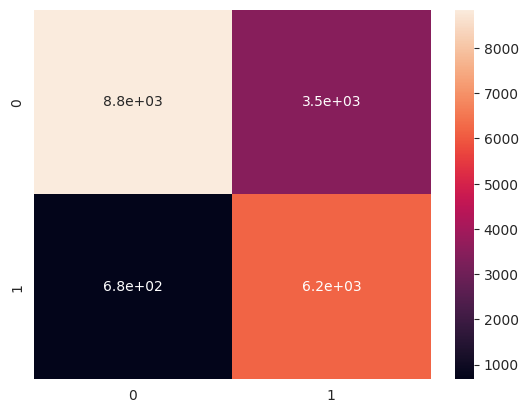

In [64]:
print(sns.heatmap(confusion_matrix(predictions, y_test), annot=True))

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [66]:
y

0        1
1        1
2        1
3        1
4        1
        ..
95906    0
95907    0
95908    0
95909    0
95910    0
Name: label, Length: 95911, dtype: int64

In [67]:
model2 = DecisionTreeClassifier(random_state=42)

In [68]:
X

,length,num_special_chars,num_subdomains,has_login,has_verify,has_secure,has_bank,has_update
0,225,28,5,1,0,0,0,0
1,81,14,4,0,0,0,0,0
2,177,19,6,0,0,1,0,1
3,60,8,5,0,0,0,0,0
4,116,13,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
95906,39,6,2,0,0,0,0,0
95907,44,8,1,0,0,0,0,0
95908,42,6,1,0,0,0,0,0
95909,45,6,1,0,0,0,0,0


In [69]:
clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [70]:
clf=(clf.fit(X,y))

In [71]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [72]:
import pydotplus

In [73]:
from IPython.display import Image

In [74]:
dot_data = tree.export_graphviz(clf, feature_names=X.columns,
                                class_names=['phishing', 'not-phishing'],
                                filled=True, out_file=None)

In [75]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="length <= 63.5\\nentropy = 1.0\\nsamples = 95911\\nvalue = [48009, 47902]\\nclass = phishing", fillcolor="#ffffff"] ;\n1 [label="has_login <= 0.5\\nentropy = 0.912\\nsamples = 68544\\nvalue = [46093, 22451]\\nclass = phishing", fillcolor="#f2be99"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="num_special_chars <= 3.5\\nentropy = 0.883\\nsamples = 65982\\nvalue = [46084, 19898]\\nclass = phishing", fillcolor="#f0b78e"] ;\n1 -> 2 ;\n3 [label="entropy = 0.955\\nsamples = 5775\\nvalue = [2167, 3608]\\nclass = not-phishing", fillcolor="#b0d8f5"] ;\n2 -> 3 ;\n4 [label="entropy = 0.842\\nsamples = 60207\\nvalue = [43917, 16290]\\nclass = phishing", fillcolor="#efb082"] ;\n2 -> 4 ;\n5 [label="length <= 48.5\\nentropy = 0.034\\nsamples = 2562\\nvalue = [9, 2553]\\nclass = not-phishing", fillcolor="#3a9de5"] ;\n1 -> 5 ;\n6 [label="entro

In [76]:
graph=pydotplus.graph_from_dot_data(dot_data)

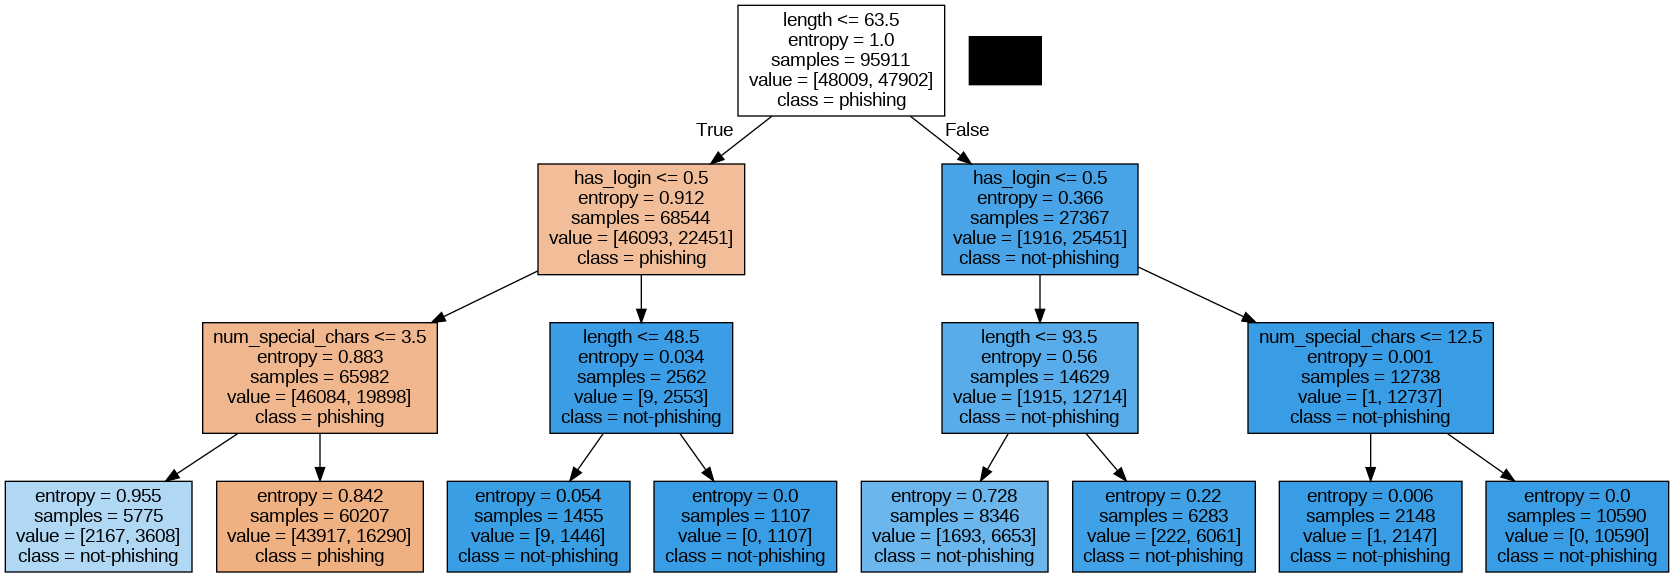

In [77]:
graph

Image(graph.create_png())

In [78]:
testData=[['www.example.com/article', 1234, 1, 10, 85.0, 90.0, 0.920, 0], # Added a comma at the end of each inner list
          ['docs.python.org/3/library/index.html',354, 1, 12, 75.0, 78.5, 0.960, 0],
          ["www.paypall-verification.net", 90, 0, 1, 0.1, 0.15, 0.85, 1],
          ['www.bbc.com/news/technology', 112, 1, 15, 100.0, 105.5, 0.950, 0],
          ["login-googIe.com", 88, 0, 0, 210.0, 0.1, 0.9, 1],
          ["www.secure-amaz0n.com", 85, 0, 0, 500.0, 0.1, 0.9, 1],
          ]

In [80]:
testData

[['www.example.com/article', 1234, 1, 10, 85.0, 90.0, 0.92, 0],
 ['docs.python.org/3/library/index.html', 354, 1, 12, 75.0, 78.5, 0.96, 0],
 ['www.paypall-verification.net', 90, 0, 1, 0.1, 0.15, 0.85, 1],
 ['www.bbc.com/news/technology', 112, 1, 15, 100.0, 105.5, 0.95, 0],
 ['login-googIe.com', 88, 0, 0, 210.0, 0.1, 0.9, 1],
 ['www.secure-amaz0n.com', 85, 0, 0, 500.0, 0.1, 0.9, 1]]

In [82]:
testData=pd.DataFrame(testData, columns=phish_data.columns)


In [83]:
testData

,domain,ranking,mld_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_ARrem,label
0,www.example.com/article,1234,1,10,85.0,90.00,0.92,0
1,docs.python.org/3/library/index.html,354,1,12,75.0,78.50,0.96,0
2,www.paypall-verification.net,90,0,1,0.1,0.15,0.85,1
3,www.bbc.com/news/technology,112,1,15,100.0,105.50,0.95,0
4,login-googIe.com,88,0,0,210.0,0.10,0.90,1
5,www.secure-amaz0n.com,85,0,0,500.0,0.10,0.90,1


In [87]:
testY=testData['label']

In [88]:
testY

0    0
1    0
2    1
3    0
4    1
5    1
Name: label, dtype: int64

In [89]:
testX=testData.drop(['domain','label'], axis=1)

In [90]:
testX

,ranking,mld_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_ARrem
0,1234,1,10,85.0,90.00,0.92
1,354,1,12,75.0,78.50,0.96
2,90,0,1,0.1,0.15,0.85
3,112,1,15,100.0,105.50,0.95
4,88,0,0,210.0,0.10,0.90
5,85,0,0,500.0,0.10,0.90
